In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings("ignore")


C:\Users\Admin\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
students_df = pd.read_csv(r"C:\Users\Admin\Downloads\Expanded_data_with_more_features.csv")
students_df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [3]:
students_df.shape

(30641, 15)

In [4]:
students_df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [5]:
students_df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [6]:
students_df.columns

Index(['Unnamed: 0', 'Gender', 'EthnicGroup', 'ParentEduc', 'LunchType',
       'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild',
       'NrSiblings', 'TransportMeans', 'WklyStudyHours', 'MathScore',
       'ReadingScore', 'WritingScore'],
      dtype='object')

In [7]:
students_df = students_df.drop(['Unnamed: 0'],axis =1)
students_df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [8]:
object_columns = students_df.select_dtypes(include='object').columns
for column in object_columns :
    print(f"Unique value of {column}")
    print(students_df[column].unique())
    print("-------------------------------------------------------------------")

Unique value of Gender
['female' 'male']
-------------------------------------------------------------------
Unique value of EthnicGroup
[nan 'group C' 'group B' 'group A' 'group D' 'group E']
-------------------------------------------------------------------
Unique value of ParentEduc
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school' nan]
-------------------------------------------------------------------
Unique value of LunchType
['standard' 'free/reduced']
-------------------------------------------------------------------
Unique value of TestPrep
['none' nan 'completed']
-------------------------------------------------------------------
Unique value of ParentMaritalStatus
['married' 'single' 'widowed' nan 'divorced']
-------------------------------------------------------------------
Unique value of PracticeSport
['regularly' 'sometimes' 'never' nan]
-------------------------------------------------------------------
Uniq

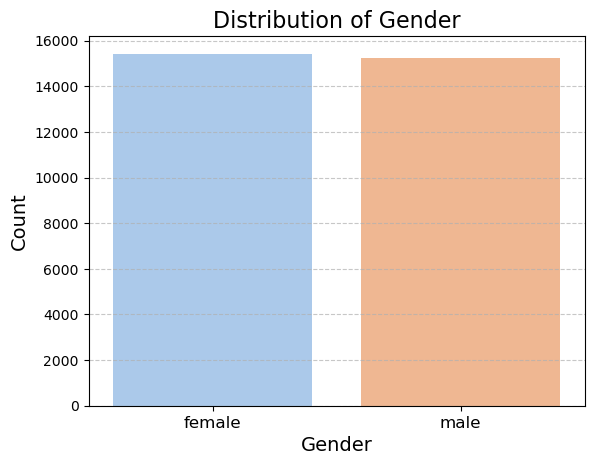

<Figure size 800x600 with 0 Axes>

In [9]:
sns.set_palette("pastel")

# Create the countplot
ax = sns.countplot(data=students_df, x="Gender")

# Add titles and labels
plt.title('Distribution of Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Customize the tick labels (optional)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)

# Add grid lines for better readability (optional)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Customize the y-axis ticks (optional)
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Adjust the figure size for better presentation (optional)
plt.figure(figsize=(8, 6))

# Show the plot
plt.show()

### In Above presentation , We get to see number of Female Students are more than Male .

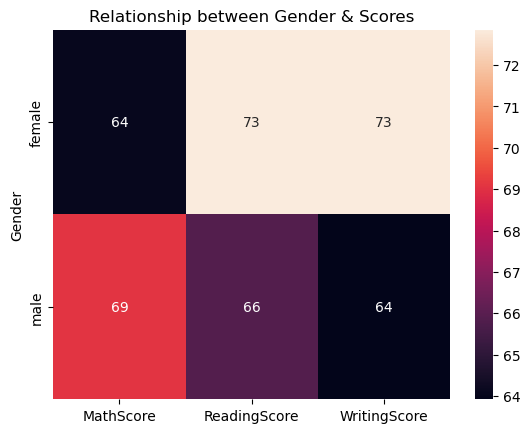

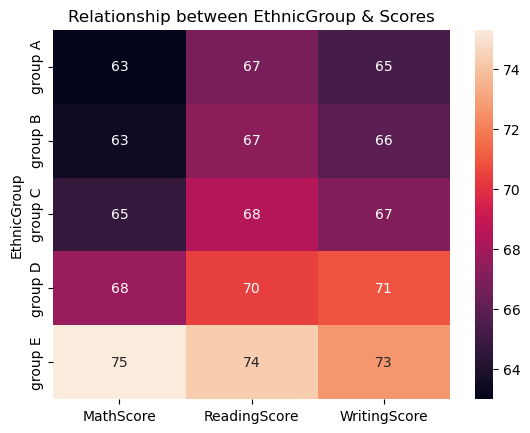

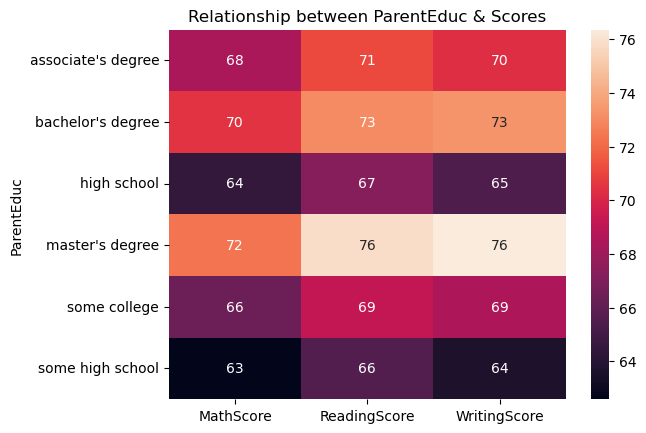

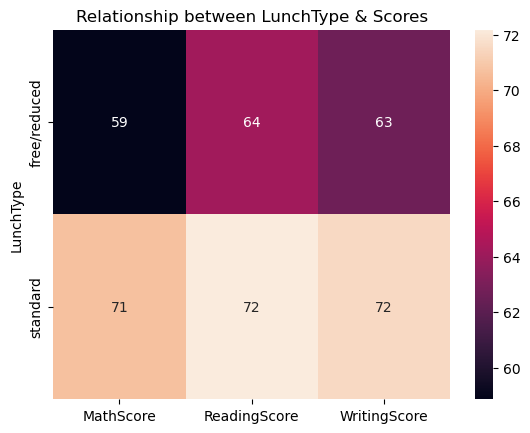

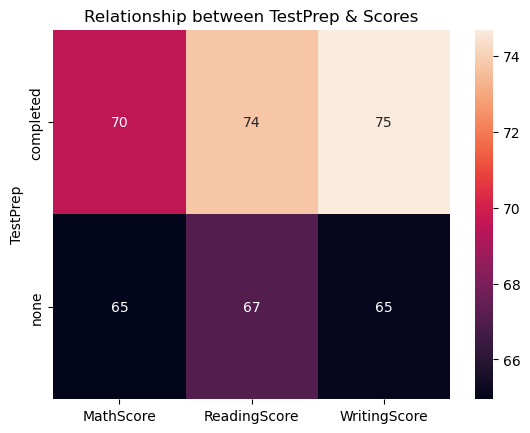

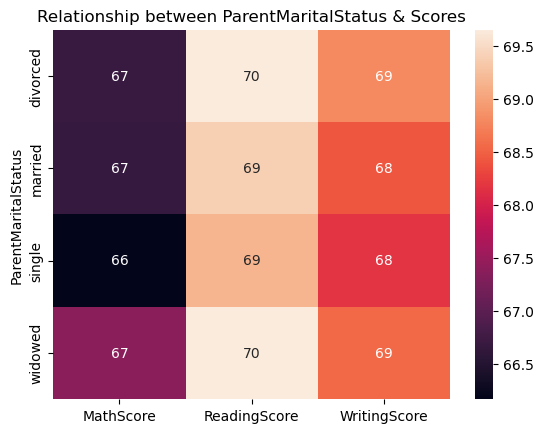

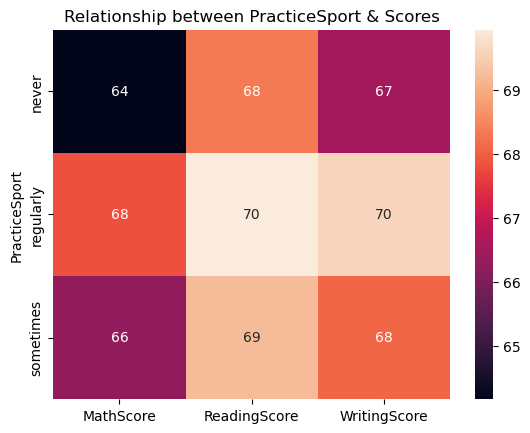

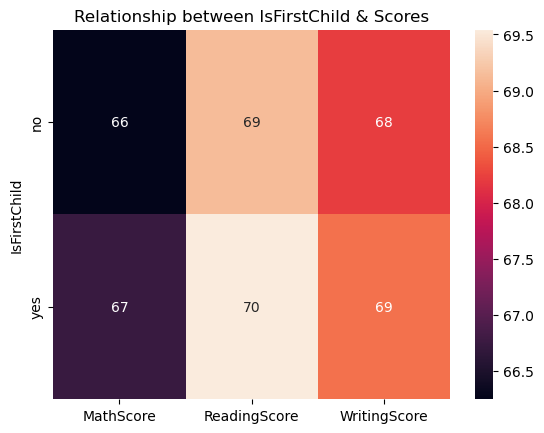

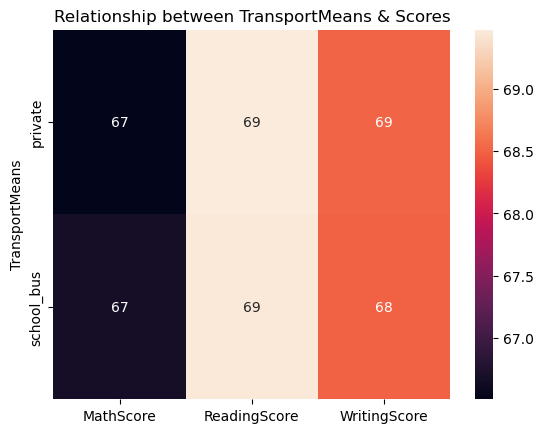

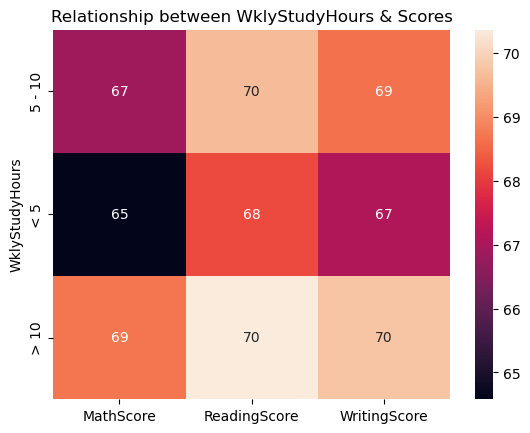

In [39]:
for column in object_columns :
    attribute_relation_measure = students_df.groupby([column]).agg({'MathScore':'mean' , 'ReadingScore':'mean',
                                                           'WritingScore':'mean'})
    sns.heatmap(attribute_relation_measure , annot = True)
    plt.title(f"Relationship between {column} & Scores")
    plt.show()

## Attribute That Imapct on Student's Scores

####         Gender : Male on an average scores more Marks in Maths than fermale but Female have scored more in Reading and Writting than Male .

####         Ethnic Group : From Group A to E we got to see linear Increase in Scores .
####         Parent Education : Students whose Parents have higher qualification averagely scored more .
####         LunchType : Students whose diet are standard averagely scored more .
####         TestPrep : Students who's completed their Test Preparation have scored more than who not completed Test Preparation.

## Attribute That dont't  Imapct on Student's Scores

####         ParentMaritalStatus : No significance difference on scores of students whose parents are wheather Married , Single , Widowed , Divorced .
####         PracticeSport : No significance difference on scores of students if he practices sport or not .
####         IsFirstChild : No Significance difference on scores wheather student is first child or not .
####         Transportation : There is not differnece on Scores wheather Student comes by Private Vehicle or School Bus .
####         WeeklyStudyHours : We got to see Negligible difference in scores .

In [47]:
students_df.columns

Index(['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep',
       'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings',
       'TransportMeans', 'WklyStudyHours', 'MathScore', 'ReadingScore',
       'WritingScore'],
      dtype='object')

In [51]:
impacting_attribute_df = students_df[['Gender','EthnicGroup','ParentEduc','LunchType'
                                      ,'TestPrep','MathScore','ReadingScore','WritingScore']]
impacting_attribute_df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,71,71,74
1,female,group C,some college,standard,NaN,69,90,88
2,female,group B,master's degree,standard,none,87,93,91
3,male,group A,associate's degree,free/reduced,none,45,56,42
4,male,group C,some college,standard,none,76,78,75
